# IMPORTING PACAKES 

In [1]:
import pandas as pd 
import numpy as np
import  matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df.head()  #CHECKING THE TOP 5 ROWS

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape # checking the shape of the data

(614, 13)

In [5]:
df.isna().sum()  # checking the null values in data 
                # THERE ARE NULL VALUES AND NEED TO BE TREATED 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.nunique()  # checking the number of unique values in the columns 

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
df.drop('Loan_ID',axis=1,inplace=True) # dropping the loan id column as it adds no information to data 

In [8]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# dividing the data in categorical and numeric for better understanding 

In [9]:


df_cat=df.select_dtypes(include=object)
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


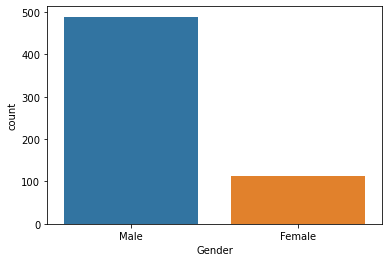

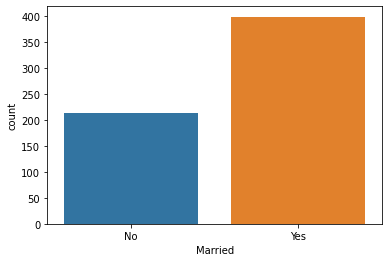

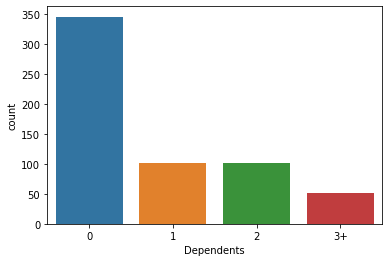

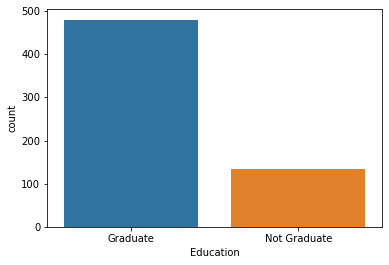

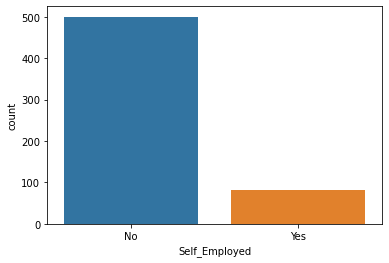

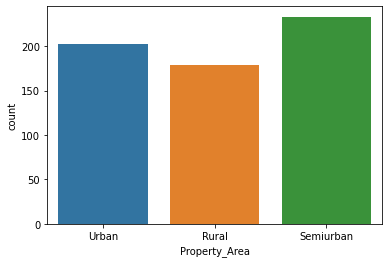

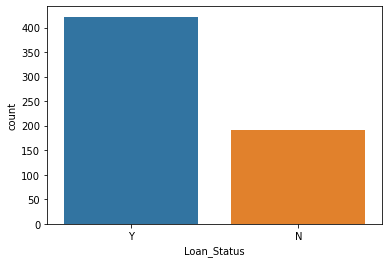

In [10]:
#checking the countplot of all the categorical columns USINFG FOR LOOP  


for feat in df_cat.columns:
    sns.countplot(data=df_cat,x=feat)
    plt.show()

In [11]:



df_numeric=df.select_dtypes(include=['float64','int64'])
df_numeric.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [12]:
# checking all the unique values in categorical data 



for feature in df_cat.columns:
    print(f'Types  in {feature} : {df_cat[feature].unique()}')

Types  in Gender : ['Male' 'Female' nan]
Types  in Married : ['No' 'Yes' nan]
Types  in Dependents : ['0' '1' '2' '3+' nan]
Types  in Education : ['Graduate' 'Not Graduate']
Types  in Self_Employed : ['No' 'Yes' nan]
Types  in Property_Area : ['Urban' 'Rural' 'Semiurban']
Types  in Loan_Status : ['Y' 'N']


In [13]:
df['Gender'].value_counts()
                              # checking number of male and female 

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
df['Married'].value_counts()    

Yes    398
No     213
Name: Married, dtype: int64

In [15]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [17]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
df['Gender'].mode()[0]

'Male'

In [19]:
df['Self_Employed'].mode()[0]

'No'

In [20]:
# filling all NAAN VALUES OF categorical data  with the mode 

In [21]:
for feat in df_cat.columns:
    df_cat[feat].fillna(df_cat[feat].mode()[0],inplace=True)

In [22]:
df_cat.isna().sum() # checking the null values after imputing them with mode

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

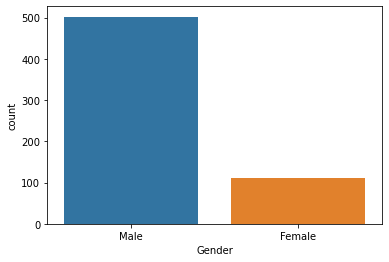

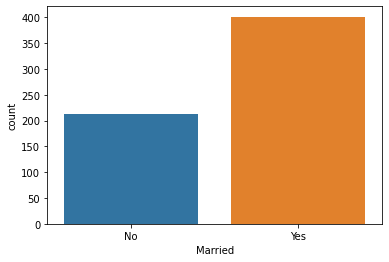

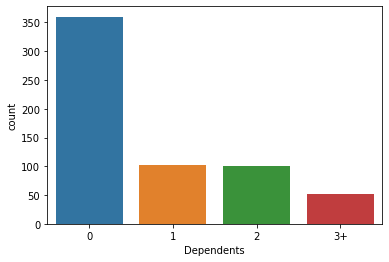

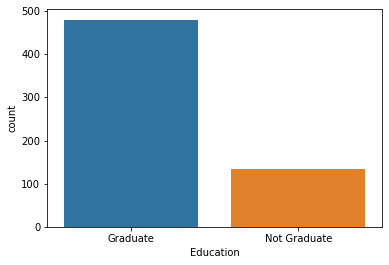

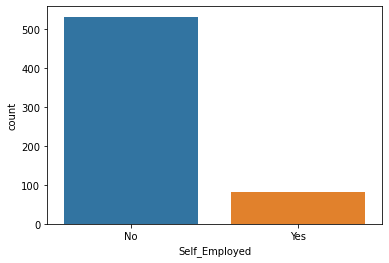

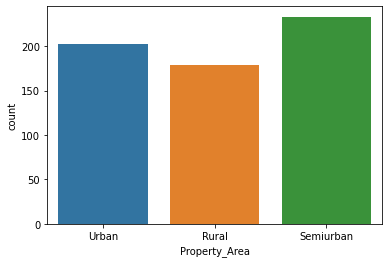

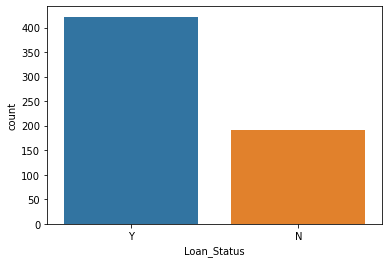

In [23]:
# checking the count plot after removing the null values 


for feat in df_cat.columns:
    sns.countplot(data=df_cat,x=feat)
    plt.show()

In [24]:

#checking the number of male and female getting loan approvals and rejection

pd.crosstab(df_cat['Gender'],df_cat['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


In [25]:
# WE CAN DO THIS BY USING GROUPBY ALSO (FOR PRACTICE PURPOSE ONLY )

In [26]:
# checking number of male and female getting approved for loans 
df_cat[df_cat['Loan_Status']=='Y'].groupby('Gender')['Loan_Status'].count()

Gender
Female     75
Male      347
Name: Loan_Status, dtype: int64

In [27]:
# checking number of male and female getting rejected for loans 

df_cat[df_cat['Loan_Status']=='N'].groupby('Gender')['Loan_Status'].count()

Gender
Female     37
Male      155
Name: Loan_Status, dtype: int64

In [28]:
# checking on the basis of education how many people getting loan approvals and rejections 

pd.crosstab(df_cat['Education'],df_cat['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [29]:
# MOST MARRIED PEOPLE GETTING THE LOAN APPROVED 

df_cat[df_cat['Loan_Status']=='Y'].groupby('Married')['Loan_Status'].count()

Married
No     134
Yes    288
Name: Loan_Status, dtype: int64

In [30]:
#PEOPLE WITH LESS NUMBER OF DEPENDENT ARE GETTING THE LOAN APPROVED 

df_cat[df_cat['Loan_Status']=='Y'].groupby('Dependents')['Loan_Status'].count()

Dependents
0     247
1      66
2      76
3+     33
Name: Loan_Status, dtype: int64

In [31]:
#SELF EMPLOYED PEOPLE ARE NOT GETTING GOOD RESPONSE WITH LOAN APPROVALS 

df_cat[df_cat['Loan_Status']=='Y'].groupby('Self_Employed')['Loan_Status'].count()

Self_Employed
No     366
Yes     56
Name: Loan_Status, dtype: int64

In [32]:
df_numeric.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [ ]:
# CHECKING THE VALUE COUNTS OF ALL NUMERIC DATA 

In [33]:
df_numeric['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea823ed8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea823edf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea823ed550>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea823c3f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea823c3d00>],
 'means': []}

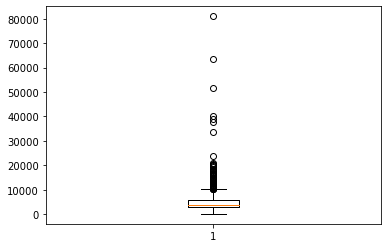

In [34]:
plt.boxplot(x='ApplicantIncome',data=df_numeric)  #checking the boxplot of column it has lot of outliers 

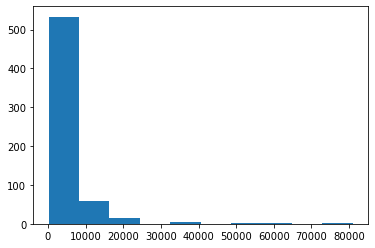

In [35]:
plt.hist(df_numeric['ApplicantIncome'])
plt.show()                               # the data is right skewed 

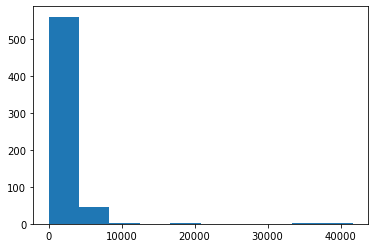

In [36]:
plt.hist(df_numeric['CoapplicantIncome'])
plt.show()                                # right skwed data 

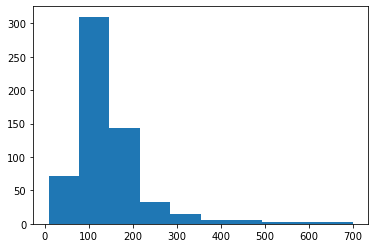

In [37]:
plt.hist(df_numeric['LoanAmount'])
plt.show() 

In [38]:
# lets normalise the skewness 

df_numeric['AplicantIncome']=np.log(df_numeric['ApplicantIncome'])


In [39]:
df_numeric['LoanAmount']=np.log(df_numeric['LoanAmount'])
df_numeric['CoapplicantIncome']=np.log(df_numeric['CoapplicantIncome'])

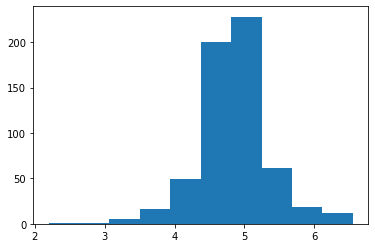

In [40]:
plt.hist(df_numeric['LoanAmount'])
plt.show()                              # the data look normal after log 

In [41]:
df_numeric.isnull().sum()   # cheking the null values of numeric columns

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
AplicantIncome        0
dtype: int64

In [42]:
# USING IMPUTATION OF MODE AND MEAN TO HANDLE NULL VALUES IN NUMERIC COLUMNS 



df_numeric.LoanAmount=df_numeric.LoanAmount.fillna(df_numeric.LoanAmount.mean())
df_numeric['Loan_Amount_Term'].fillna(df_numeric['Loan_Amount_Term'].mode()[0],inplace=True)
df_numeric['Credit_History'].fillna(df_numeric['Credit_History'].mode()[0],inplace=True)


In [43]:
df_numeric.isnull().sum()  # NULL VALUES HAS BEEN REMOVED 

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
AplicantIncome       0
dtype: int64

In [44]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [45]:
# applying one hot  encoder to change the categorical data into numeric



In [46]:
df_cat=pd.get_dummies(df_cat,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],drop_first=True)

In [47]:
df_cat.head()

,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,Y,1,0,0,0,0,0,0,0,1
1,N,1,1,1,0,0,0,0,0,0
2,Y,1,1,0,0,0,0,1,0,1
3,Y,1,1,0,0,0,1,0,0,1
4,Y,1,0,0,0,0,0,0,0,1


In [49]:
# applying the label encoder to the target variable loan_status

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cat.Loan_Status=le.fit_transform(df_cat.Loan_Status)

In [50]:
df_cat.head()

,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,0,0,0,0,0,1
1,0,1,1,1,0,0,0,0,0,0
2,1,1,1,0,0,0,0,1,0,1
3,1,1,1,0,0,0,1,0,0,1
4,1,1,0,0,0,0,0,0,0,1


In [ ]:
# COMBINING NUMERIC AND CATEGORICAL DATA AFTER CLEANING THE DATA 

In [51]:
df_concat=pd.concat([df_cat,df_numeric],axis=1)
df_concat

,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,AplicantIncome
0,1,1,0,0,0,0,0,0,0,1,5849,-inf,4.857444,360.0,1.0,8.674026
1,0,1,1,1,0,0,0,0,0,0,4583,7.318540,4.852030,360.0,1.0,8.430109
2,1,1,1,0,0,0,0,1,0,1,3000,-inf,4.189655,360.0,1.0,8.006368
3,1,1,1,0,0,0,1,0,0,1,2583,7.765569,4.787492,360.0,1.0,7.856707
4,1,1,0,0,0,0,0,0,0,1,6000,-inf,4.948760,360.0,1.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,0,0,0,0,0,2900,-inf,4.262680,360.0,1.0,7.972466
610,1,1,1,0,0,1,0,0,0,0,4106,-inf,3.688879,180.0,1.0,8.320205
611,1,1,1,1,0,0,0,0,0,1,8072,5.480639,5.533389,360.0,1.0,8.996157
612,1,1,1,0,1,0,0,0,0,1,7583,-inf,5.231109,360.0,1.0,8.933664


In [74]:
# THERE ARE INFINITE VALUES 

# removing the infinite values by first converting them to naan and then removing the naan values 


df_concat.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
df_concat.dropna(inplace=True)

df_concat.head()

,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,AplicantIncome
1,0,1,1,1,0,0,0,0,0,0,4583,7.318540,4.852030,360.0,1.0,8.430109
3,1,1,1,0,0,0,1,0,0,1,2583,7.765569,4.787492,360.0,1.0,7.856707
5,1,1,1,0,1,0,0,1,0,1,5417,8.341887,5.587249,360.0,1.0,8.597297
6,1,1,1,0,0,0,1,0,0,1,2333,7.323831,4.553877,360.0,1.0,7.754910
7,0,1,1,0,0,1,0,0,1,0,3036,7.825645,5.062595,360.0,0.0,8.018296


In [80]:
df_concat.shape

(341, 16)

In [81]:
df_concat.isnull().sum()

Loan_Status                0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
AplicantIncome             0
dtype: int64

In [ ]:
#DIVIDING THE DATA INTO INDEPENDENT AND DEPENDENT 

In [82]:
x=df_concat.drop(['Loan_Status'],axis=1)
y=df_concat['Loan_Status']

In [83]:
x.shape

(341, 15)

In [84]:
y.shape

(341,)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=4)

In [87]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(272, 15)
(272,)
(69, 15)
(69,)


In [96]:
sc=StandardScaler()
sc.fit(x_train,y_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [97]:
# APPLYING DECISION TREE  ALSO APPLYING CROSS VALIDATION 
dtc=DecisionTreeClassifier()

In [98]:
dtc.fit(x_train,y_train)
pdtc=dtc.predict(x_test)
print(accuracy_score(y_test,pdtc))
print(confusion_matrix(y_test,pdtc))

0.7391304347826086
[[ 9 11]
 [ 7 42]]


In [99]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.73913043 0.79411765 0.69117647 0.76470588 0.72058824]
0.7419437340153452
0.03544437787095154


In [100]:
# APPLYING RANDON FOREST 

In [101]:
rfc=RandomForestClassifier()

In [102]:
rfc.fit(x_train,y_train)
prfc=rfc.predict(x_test)
print(accuracy_score(y_test,prfc))
print(confusion_matrix(y_test,prfc))

0.7971014492753623
[[11  9]
 [ 5 44]]


In [103]:
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.82608696 0.82352941 0.83823529 0.85294118 0.82352941]
0.8328644501278772
0.01142051844591617


In [104]:
# APPLYING  KNeighborsClassifier


knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pknn=knn.predict(x_test)
print(accuracy_score(y_test,pknn))
print(confusion_matrix(y_test,pknn))

0.7971014492753623
[[ 8 12]
 [ 2 47]]


In [105]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.72463768 0.70588235 0.58823529 0.64705882 0.69117647]
0.6713981244671782
0.04883288504154094


# SELECTING THE BEST MODEL 

RANDOM FOREST IS PERFORMING BEST WITH 83% ACCURACY 

# *CONCLUSION

MOST OF THE MALE CANDIDATES ARE GETTING LOAN APPROVALS AS COMPARE TO FEMALES 
EDUCATION IS PLAYING IMPORTANT ROLE IN LOAN APPROVALS ,GRADUATES ARE GETTING MORE LOANS AS COMPARE TO UNDERGRADUATE 
MOST MARRIED PEOPLE GETTING THE LOAN APPROVED
PEOPLE WITH LESS NUMBER OF DEPENDENT ARE GETTING THE LOAN APPROVED 
SELF EMPLOYED PEOPLE ARE NOT GETTING GOOD RESPONSE WITH LOAN APPROVALS 
DATA HAD NULL VALUES ,THOSE HAVE BEEN HANDELED 
DATA HAS BEEN SCALED FOR BETTER PREDICTION
RANDOM FOREST IS RESPONDING THE BEST 
